    Name	                                         Description
1	Year                                             1987-2008

2	Month	                                         1-12

3	DayofMonth	                                     1-31

4	DayOfWeek	                                     1 (Monday) - 7 (Sunday)

5	DepTime	actual departure time                    (local, hhmm)

6	CRSDepTime	scheduled departure time             (local, hhmm)

7	ArrTime	actual arrival time                      (local, hhmm)

8	CRSArrTime	scheduled arrival time               (local, hhmm)

9	UniqueCarrier	                                  unique carrier code

10	FlightNum	                                      flight number

11	TailNum	                                          plane tail number

12	ActualElapsedTime	                              (in minutes)

13	CRSElapsedTime	                                  (in minutes)

14	AirTime	                                          (in minutes)

15	ArrDelay	                                      arrival delay, in minutes ArrDelay. Difference in minutes between                                                               scheduled and actual arrival time. Early arrivals show negative numbers.

16	DepDelay	                                      (in minutes)  departure delay,

17	Origin	                                          origin IATA airport code

18	Dest	                                          destination IATA airport code

19	Distance	                                      in miles

20	TaxiIn	                                          taxi in time, in minutes

21	TaxiOut	                                          taxi out time in minutes

22	Cancelled	                                      was the flight cancelled?

23	CancellationCode	                              reason for cancellation (A = carrier, B = weather, C = NAS, D = security)

24	Diverted	                                      1 = yes, 0 = no

25	CarrierDelay	                                  in minutes

26	WeatherDelay	                                  in minutes

27	NASDelay	                                      in minutes

28	SecurityDelay	                                  in minutes

29	LateAircraftDelay	                              in minutes

In [2]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
import warnings

In [3]:
filename = "C:/Users/clyde/Documents/Thinkful/Data Science Bootcamp/Unit-3/Lesson 5/2008.csv"
df = pd.read_csv(filename,nrows=3048576)

In [4]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [5]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

C:\Users\clyde\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


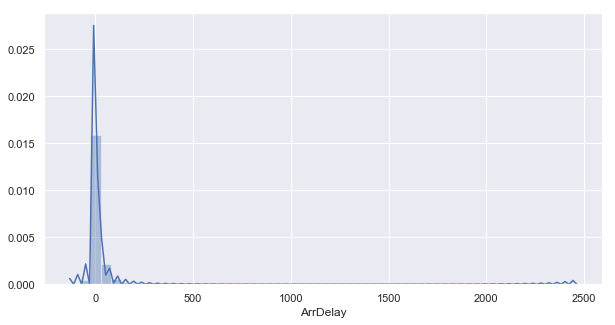

(2970998,)

In [6]:
import seaborn as sns
sns.set()
f, ax = plt.subplots(1, 1, figsize=(10,5), sharex=True)
ax = sns.distplot(df['ArrDelay'].dropna())
plt.show()
df['ArrDelay'].dropna().shape

In [7]:
df.corrwith(df.ArrDelay)

Year                      NaN
Month               -0.050153
DayofMonth          -0.023396
DayOfWeek           -0.003151
DepTime              0.176935
CRSDepTime           0.110382
ArrTime              0.069846
CRSArrTime           0.107960
FlightNum            0.023496
ActualElapsedTime    0.083676
CRSElapsedTime       0.004235
AirTime              0.029791
ArrDelay             1.000000
DepDelay             0.931702
Distance            -0.001976
TaxiIn               0.110692
TaxiOut              0.307185
Cancelled                 NaN
Diverted                  NaN
CarrierDelay         0.530970
WeatherDelay         0.265530
NASDelay             0.339598
SecurityDelay       -0.001236
LateAircraftDelay    0.501490
dtype: float64

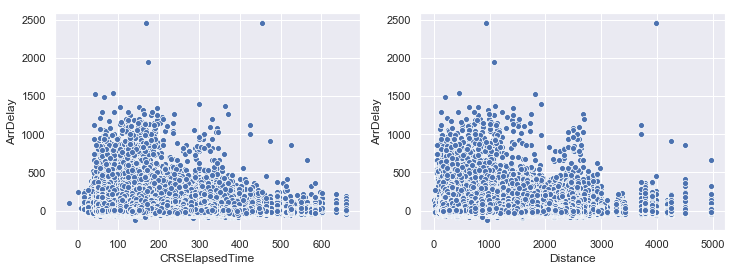

In [ ]:
plt.rcParams['figure.figsize'] = (12,4)
f,axes = plt.subplots(1,2)
sns.scatterplot(x='CRSElapsedTime',y='ArrDelay',data=df,ax=axes[0])
sns.scatterplot(x='Distance',y='ArrDelay',data=df,ax=axes[1])

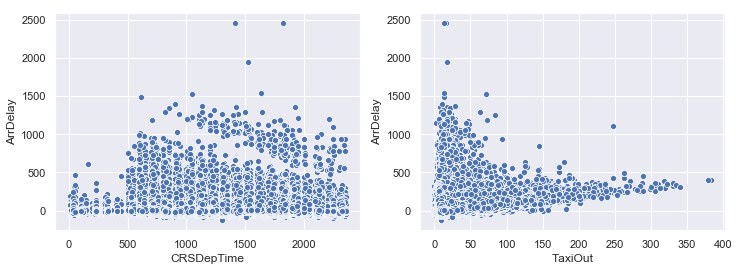

In [ ]:
f,axes = plt.subplots(1,2)
sns.scatterplot(x='CRSDepTime',y='ArrDelay',data=df, ax=axes[0])
sns.scatterplot(x='TaxiOut',y='ArrDelay',data=df, ax=axes[1])

In [8]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,CancellationCode,2977668,2.325938
1,LateAircraftDelay,2330512,23.554079
2,NASDelay,2330512,23.554079
3,WeatherDelay,2330512,23.554079
4,CarrierDelay,2330512,23.554079
5,SecurityDelay,2330512,23.554079
6,TaxiIn,77578,97.455271
7,AirTime,77578,97.455271
8,ActualElapsedTime,77578,97.455271
9,ArrDelay,77578,97.455271


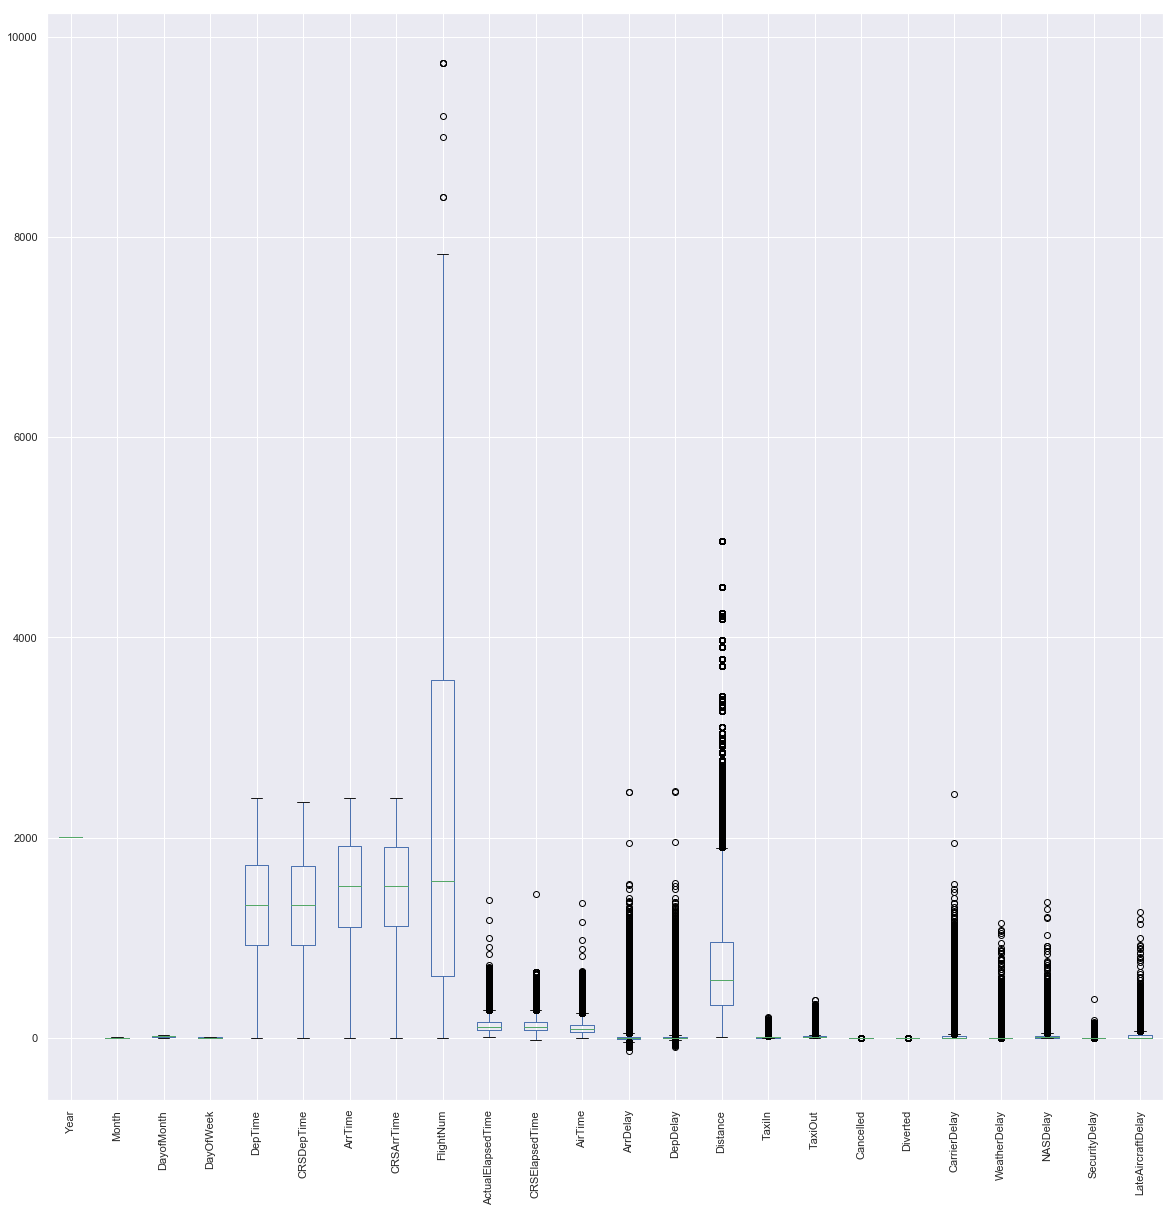

In [8]:
df.plot.box(return_type='axes', figsize=(20,20))
plt.xticks(rotation='vertical')
plt.show()

In [9]:
dg = df.drop(['CancellationCode','TailNum','FlightNum','Origin','Dest','Month', 'DayofMonth', 'DayOfWeek'],axis=1)
dg = dg.dropna()

In [10]:
temp = dg.ArrDelay
y = np.where(dg.ArrDelay>30, 1, 0)

In [11]:
dg.columns

Index(['Year', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime',
       'UniqueCarrier', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
       'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled',
       'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay'],
      dtype='object')

In [13]:
X = dg.drop(['ArrDelay','UniqueCarrier','DepDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'],axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

C:\Users\clyde\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\clyde\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.5,random_state = 24)

In [15]:
from sklearn.svm import SVR
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Regressor": SVR(gamma='auto'),
    #"DecisionTreeClassifier": DecisionTreeClassifier()
}

In [ ]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=2)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")


C:\Users\clyde\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\clyde\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\clyde\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Classifiers:  LogisticRegression Has a training score of 69.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 74.0 % accuracy score


In [15]:
RForest = RandomForestClassifier()
RForest.fit(X_train, y_train)

C:\Users\clyde\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
rf_pred = RForest.predict(X_test)

In [20]:
rf_score = RForest.score(X_test,y_test)

In [21]:
rf_score

0.9362535929944963

In [22]:
pd.crosstab(rf_pred,y_test)

col_0,0,1
row_0,,
0,144225,16677
1,6210,191920
